<a href="https://colab.research.google.com/github/vislupus/machine-learning/blob/master/Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.2.0


In [ ]:
glass_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/glass.csv', parse_dates=True, encoding = "cp1252")
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass_data.groupby('Type').count().reset_index()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0,70,70,70,70,70,70,70,70,70
1,1,76,76,76,76,76,76,76,76,76
2,2,17,17,17,17,17,17,17,17,17
3,4,13,13,13,13,13,13,13,13,13
4,5,9,9,9,9,9,9,9,9,9
5,6,29,29,29,29,29,29,29,29,29


In [ ]:
glass_data['Type'].replace(to_replace={1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6}, inplace=True)

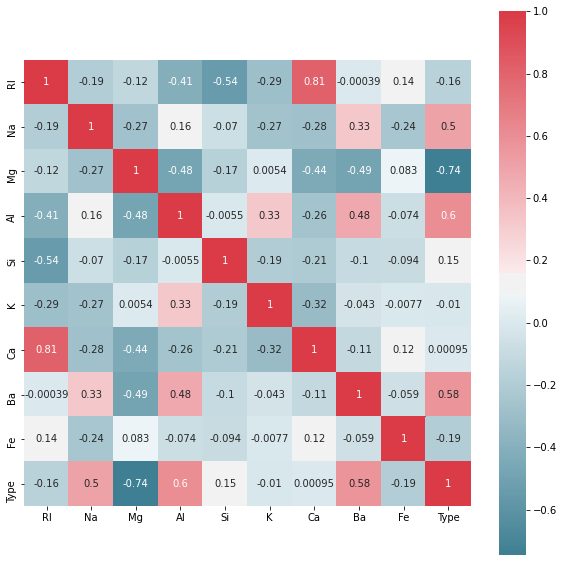

In [ ]:
corr = glass_data.corr(method = "pearson")
# corr = glass_data.corr(method = "spearman")
# corr = glass_data.corr(method = "kendall")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)

In [ ]:
X = glass_data[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]

y = glass_data['Type']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape[1])
print(y.unique())

9
[0 1 2 4 5 6]


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=155, input_shape=(X_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(units=72, activation='relu'),
  tf.keras.layers.Dense(units=152, activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=152, activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=7, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_826 (Dense)            (None, 155)               1550      
_________________________________________________________________
dense_827 (Dense)            (None, 72)                11232     
_________________________________________________________________
dense_828 (Dense)            (None, 152)               11096     
_________________________________________________________________
dense_829 (Dense)            (None, 52)                7956      
_________________________________________________________________
dense_830 (Dense)            (None, 152)               8056      
_________________________________________________________________
dense_831 (Dense)            (None, 52)                7956      
_________________________________________________________________
dense_832 (Dense)            (None, 7)              

In [ ]:
cl = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50)

Epoch 1/50
6/6 [==============================] - 0s 24ms/step - loss: 1.8742 - accuracy: 0.3977 - val_loss: 1.7111 - val_accuracy: 0.5581
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 1.6443 - accuracy: 0.4327 - val_loss: 1.3978 - val_accuracy: 0.5581
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 1.3774 - accuracy: 0.4561 - val_loss: 1.2158 - val_accuracy: 0.6279
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 1.1971 - accuracy: 0.6140 - val_loss: 1.1702 - val_accuracy: 0.3721
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0790 - accuracy: 0.6433 - val_loss: 1.0275 - val_accuracy: 0.5814
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.9718 - accuracy: 0.6901 - val_loss: 0.9867 - val_accuracy: 0.5349
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.8782 - accuracy: 0.6842 - val_loss: 0.9077 - val_accuracy: 0.6047
Epoch 8/50
6/6 [=================

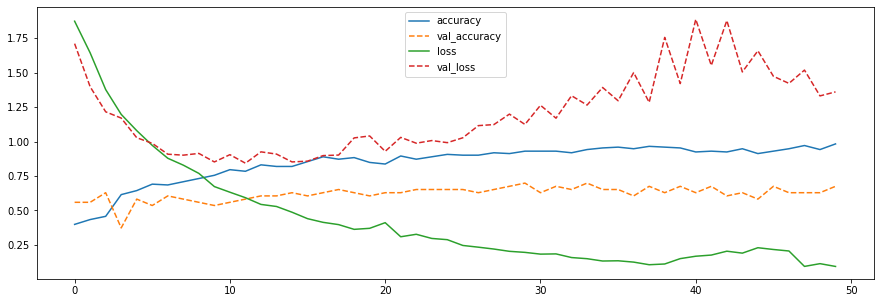

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(cl.history['accuracy'], label='accuracy')
plt.plot(cl.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.plot(cl.history['loss'], label='loss')
plt.plot(cl.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()

In [ ]:
y_pred = model.predict(X_test)
y_test_list=list(y_test)
total=len(y_test_list)
correct=0

# for i in range(len(y_test_list)):
#   print(f'{i+1} - {y_pred[4][i]:.3f} - {y_test_list[4]}')
#   if np.argmax(y_pred[i])+1==y_test_list[i]:
#     print(f'{i+1} - {np.argmax(y_pred[i])} - {y_test_list[i]}')

for i in range(total):
  # print(f'{np.argmax(y_pred[i])} - {np.amax(y_pred[i])} - {y_test_list[i]}')
  if(np.argmax(y_pred[i])==y_test_list[i]):
    correct+=1
    
print(f'{correct}/{total}')
print(correct/total)

29/43
0.6744186046511628


Text(0.5, 24.0, 'Predicted label')

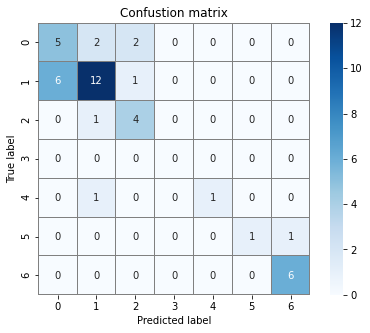

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)
cm = tf.math.confusion_matrix(y_test, p_test)

f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.01, linecolor='grey')
plt.title('Confustion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')